# Analysing TV data

This project (by Datacamp) is about cleaning, exploring and analyzing data from Wikipedia pages about the Superbowl. The following code helps understand the effect of the Superbowl on television viewership, the performances of musicians over time, or the evolution of ratings, ad costs and viewership. 

In [29]:
# Importing dependencies

import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [18]:
pwd # Check working directory

'C:\\Users\\hp98\\DSB\\Datacamp\\Analyzing TV Data'

### Data import

In [19]:
# Load the data
super_bowls = pd.read_csv('super_bowls.csv')
tv = pd.read_csv('tv.csv')
halftime_musicians = pd.read_csv('halftime_musicians.csv')

# Get a glimpse at the first rows
display(super_bowls.head())
display(tv.head())
display(halftime_musicians.head())

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


,super_bowl,network,avg_us_viewers,total_us_viewers,rating_household,share_household,rating_18_49,share_18_49,ad_cost
0,52,NBC,103390000,NaN,43.1,68,33.4,78.0,5000000
1,51,Fox,111319000,172000000.0,45.3,73,37.1,79.0,5000000
2,50,CBS,111864000,167000000.0,46.6,72,37.7,79.0,5000000
3,49,NBC,114442000,168000000.0,47.5,71,39.1,79.0,4500000
4,48,Fox,112191000,167000000.0,46.7,69,39.3,77.0,4000000


,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


### Are there issues in the dataset?

In [20]:
tv.info()

print('\n')

halftime_musicians.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   super_bowl        53 non-null     int64  
 1   network           53 non-null     object 
 2   avg_us_viewers    53 non-null     int64  
 3   total_us_viewers  15 non-null     float64
 4   rating_household  53 non-null     float64
 5   share_household   53 non-null     int64  
 6   rating_18_49      15 non-null     float64
 7   share_18_49       6 non-null      float64
 8   ad_cost           53 non-null     int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 3.9+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: 

### Combined points analyis

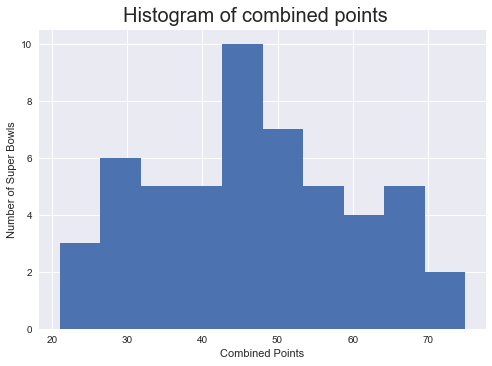

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
43,1975-01-12,9,Tulane Stadium,New Orleans,Louisiana,80997,Pittsburgh Steelers,16,Terry Bradshaw,NaN,Chuck Noll,Minnesota Vikings,6,Fran Tarkenton,NaN,Bud Grant,22,10
45,1973-01-14,7,Memorial Coliseum,Los Angeles,California,90182,Miami Dolphins,14,Bob Griese,NaN,Don Shula,Washington Redskins,7,Bill Kilmer,NaN,George Allen,21,7
49,1969-01-12,3,Orange Bowl,Miami,Florida,75389,New York Jets,16,Joe Namath,NaN,Weeb Ewbank,Baltimore Colts,7,Earl Morrall,Johnny Unitas,Don Shula,23,9


In [21]:
plt.style.use('seaborn')

plt.hist(super_bowls.combined_pts)
plt.xlabel('Combined Points')
plt.ylabel('Number of Super Bowls')
plt.figtext(.5,.9,'Histogram of combined points', fontsize=20, ha='center')
plt.show()

# Extreme values of combined points
display(super_bowls[super_bowls['combined_pts'] > 70])
display(super_bowls[super_bowls['combined_pts'] < 25]) 

### Evolution of the point difference

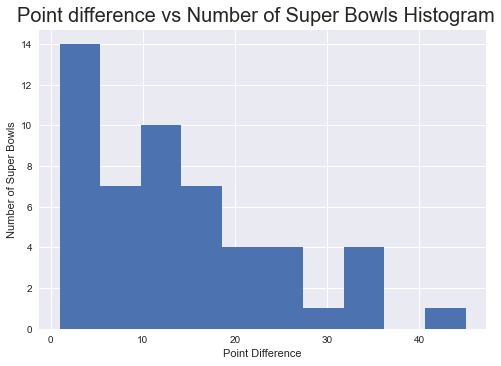

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
27,1991-01-27,25,Tampa Stadium,Tampa,Florida,73813,New York Giants,20,Jeff Hostetler,NaN,Bill Parcells,Buffalo Bills,19,Jim Kelly,NaN,Marv Levy,39,1


,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35
15,2003-01-26,37,Qualcomm Stadium,San Diego,California,67603,Tampa Bay Buccaneers,48,Brad Johnson,NaN,Jon Gruden,Oakland Raiders,21,Rich Gannon,NaN,Bill Callahan,69,27
21,1997-01-26,31,Louisiana Superdome,New Orleans,Louisiana,72301,Green Bay Packers,35,Brett Favre,NaN,Mike Holmgren,New England Patriots,21,Drew Bledsoe,NaN,Bill Parcells,56,14
23,1995-01-29,29,Joe Robbie Stadium,Miami Gardens,Florida,74107,San Francisco 49ers,49,Steve Young,NaN,George Seifert,San Diego Chargers,26,Stan Humphreys,NaN,Bobby Ross,75,23
25,1993-01-31,27,Rose Bowl,Pasadena,California,98374,Dallas Cowboys,52,Troy Aikman,NaN,Jimmy Johnson,Buffalo Bills,17,Jim Kelly,Frank Reich,Marv Levy,69,35
26,1992-01-26,26,Metrodome,Minneapolis,Minnesota,63130,Washington Redskins,37,Mark Rypien,NaN,Joe Gibbs,Buffalo Bills,24,Jim Kelly,NaN,Marv Levy,61,13
28,1990-01-28,24,Louisiana Superdome,New Orleans,Louisiana,72919,San Francisco 49ers,55,Joe Montana,NaN,George Seifert,Denver Broncos,10,John Elway,NaN,Dan Reeves,65,45
30,1988-01-31,22,Jack Murphy Stadium,San Diego,California,73302,Washington Redskins,42,Doug Williams,NaN,Joe Gibbs,Denver Broncos,10,John Elway,NaN,Dan Reeves,52,32
31,1987-01-25,21,Rose Bowl,Pasadena,California,101063,New York Giants,39,Phil Simms,NaN,Bill Parcells,Denver Broncos,20,John Elway,NaN,Dan Reeves,59,19


In [22]:
plt.hist(super_bowls.difference_pts)
plt.xlabel('Point Difference')
plt.ylabel('Number of Super Bowls')
plt.figtext(.5,.9,'Point difference vs Number of Super Bowls Histogram', fontsize=20, ha='center')
plt.show()

# Extreme values
display(super_bowls[super_bowls['difference_pts'] == 1])
display(super_bowls[super_bowls['winning_pts']>=35])

### Impact of heavy losses on viewership

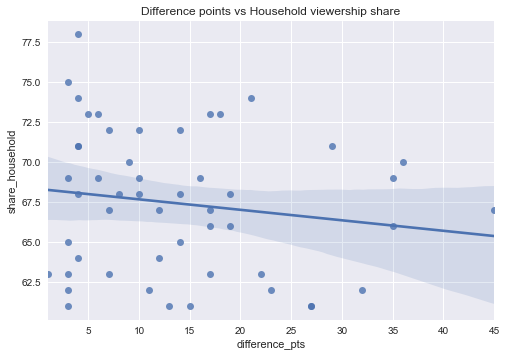

In [23]:
# We merge the two datasets while filtering out SB I because it was split over two networks
games_tv = pd.merge(tv[tv['super_bowl'] > 1], super_bowls, on='super_bowl')

# Create a scatter plot with a linear regression model fit
ax = sns.regplot(x=games_tv.difference_pts, y=games_tv.share_household, data=games_tv)
ax.set_title('Difference points vs Household viewership share');

### Evolution of rating, viewership ad ad costs

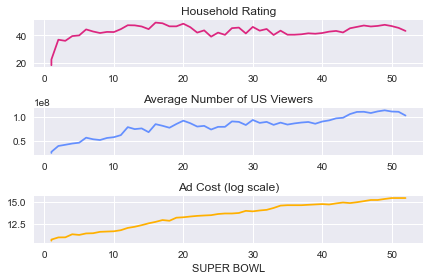

In [30]:
plt.subplot(311)
plt.plot(tv.super_bowl, tv.rating_household, color='#DC267F')
plt.title('Household Rating')

plt.subplot(312)
plt.plot(tv.super_bowl, tv.avg_us_viewers, color='#648FFF')
plt.title('Average Number of US Viewers')

plt.subplot(313)
plt.plot(tv.super_bowl, np.log(tv.ad_cost), color='#FFB000')
plt.title('Ad Cost (log scale)')
plt.xlabel('SUPER BOWL')

plt.tight_layout() # to improve the overall layout

Clearly the ad cost has risen exponentially whereas the ratings and the viewership remained constant (it would be interesting to compute the vierwership in proportion to the entire US population).

### Show appearances

In [31]:
halftime_appearances = halftime_musicians.groupby('musician').count()['super_bowl'].reset_index()
halftime_appearances = halftime_appearances.sort_values('super_bowl', ascending=False)

halftime_appearances[halftime_appearances['super_bowl']>1] # Who performed more than once?

,musician,super_bowl
28,Grambling State University Tiger Marching Band,6
104,Up with People,4
1,Al Hirt,4
83,The Human Jukebox,3
76,Spirit of Troy,2
25,Florida A&M University Marching 100 Band,2
26,Gloria Estefan,2
102,University of Minnesota Marching Band,2
10,Bruno Mars,2
64,Pete Fountain,2


### Bands and other musicians

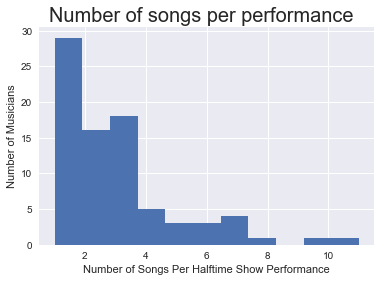

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
70,30,Diana Ross,10.0
10,49,Katy Perry,8.0
2,51,Lady Gaga,7.0
90,23,Elvis Presto,7.0


In [36]:
# We distinguish between bands and other musicians
no_bands = halftime_musicians[~halftime_musicians.musician.str.contains('Marching')]
no_bands = no_bands[~no_bands.musician.str.contains('Spirit')]

most_songs = int(max(no_bands['num_songs'].values))
plt.hist(no_bands.num_songs.dropna(), bins=most_songs)
plt.xlabel('Number of Songs Per Halftime Show Performance')
plt.ylabel('Number of Musicians')
plt.figtext(.5, .9, 'Number of songs per performance', fontsize=20, ha='center')
plt.show()

no_bands = no_bands.sort_values('num_songs', ascending=False) # Number of appearance of individual musicians
display(no_bands.head())

### Conclusion